<a href="https://colab.research.google.com/github/jlerapatty/helmet_detection/blob/main/Helmet_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detection-2 in yolov8:: 100%|██████████| 218/218 [00:00<00:00, 5173.38it/s]


✅ Dataset berhasil diunduh!
📁 Lokasi dataset: /content/Helmet-Detection-2

✅ File data.yaml sudah diperbaiki:
names:
- helmet
- no_helmet
nc: 2
roboflow:
  license: CC BY 4.0
  project: helmet-detection-shw28
  url: https://universe.roboflow.com/jo-i0yms/helmet-detection-shw28/dataset/2
  version: 2
  workspace: jo-i0yms
test: ../test/images
train: ../train/images
val: ../train/images


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Helmet-Detection-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_detector_analysis, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

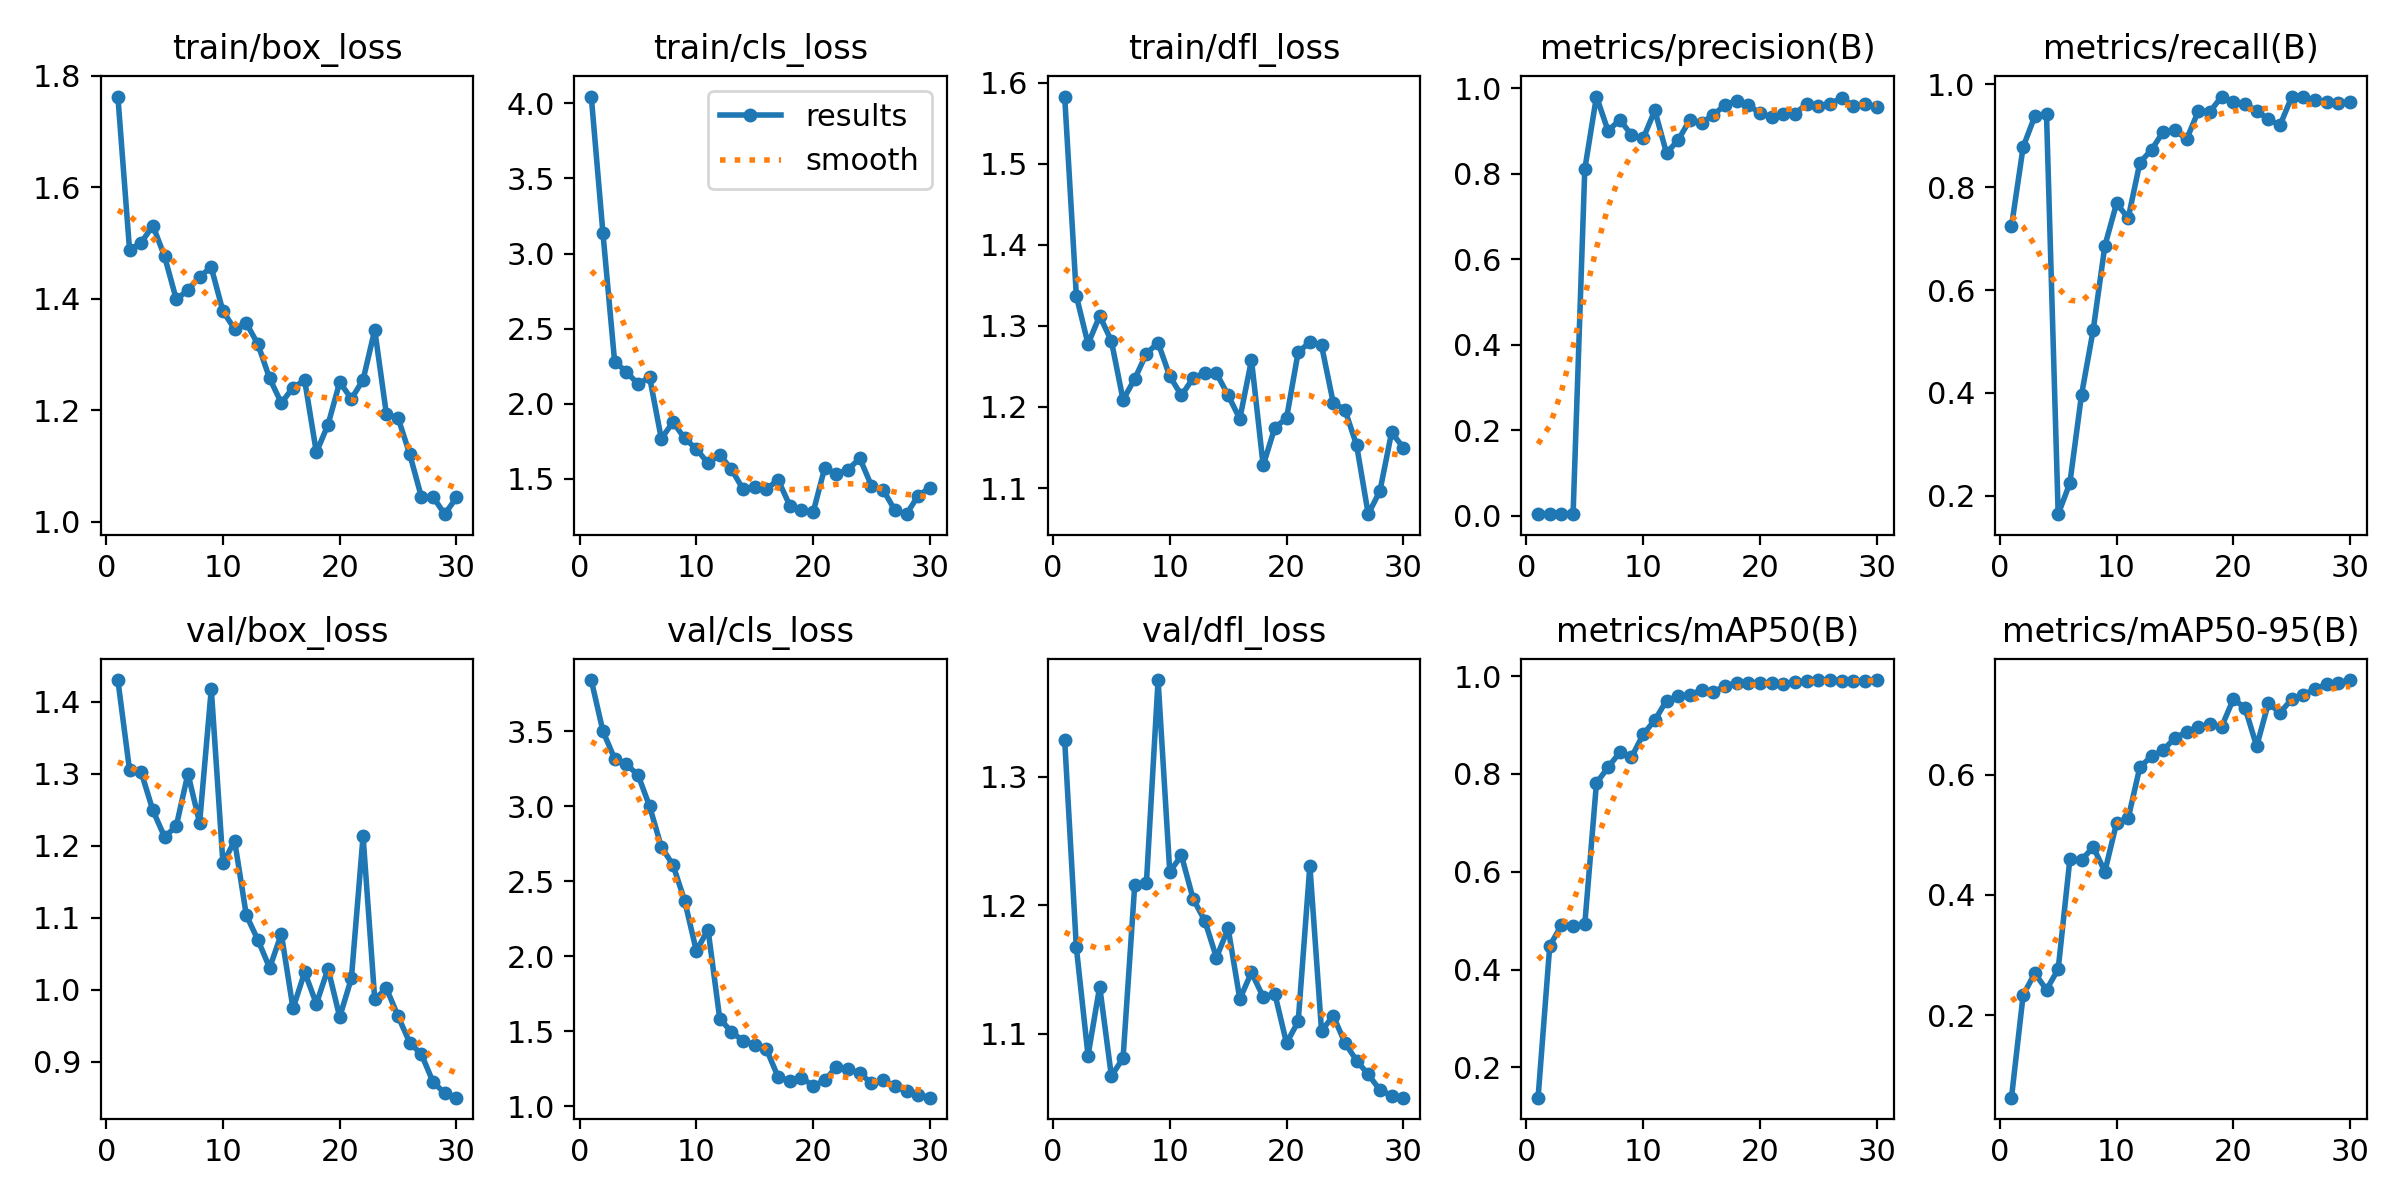



🧩 Confusion Matrix:


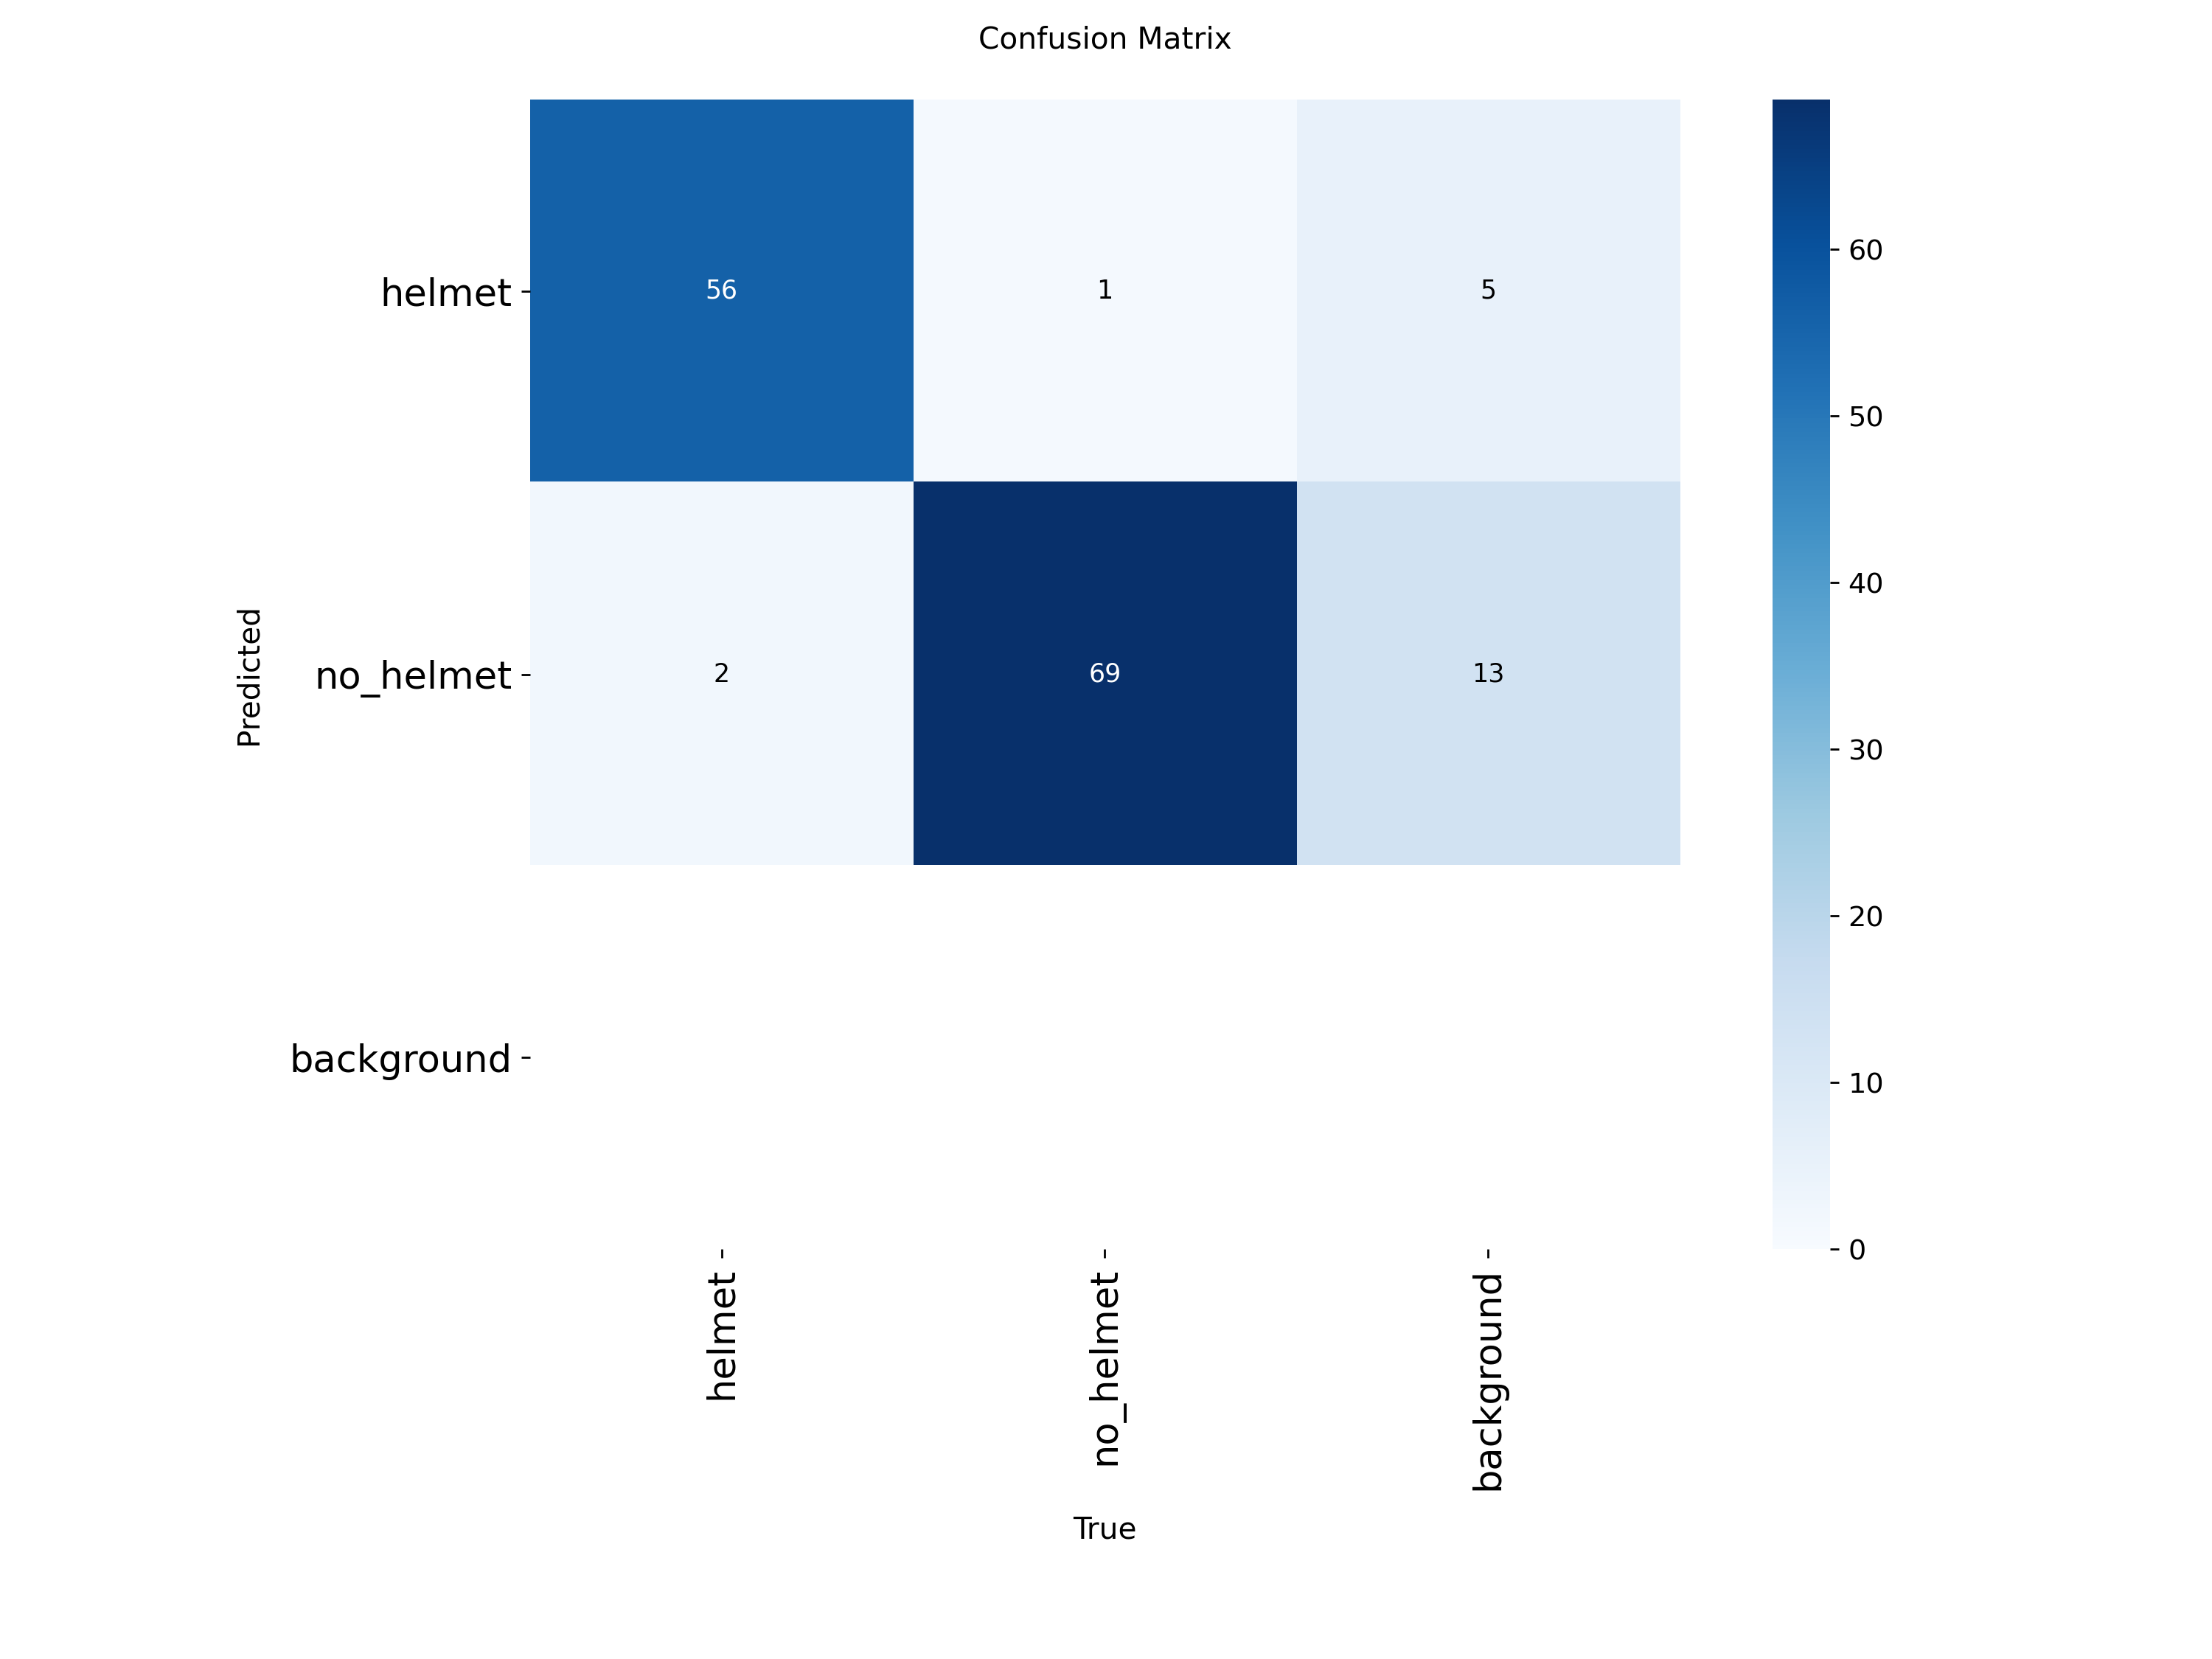



🔍 Validation Predictions:


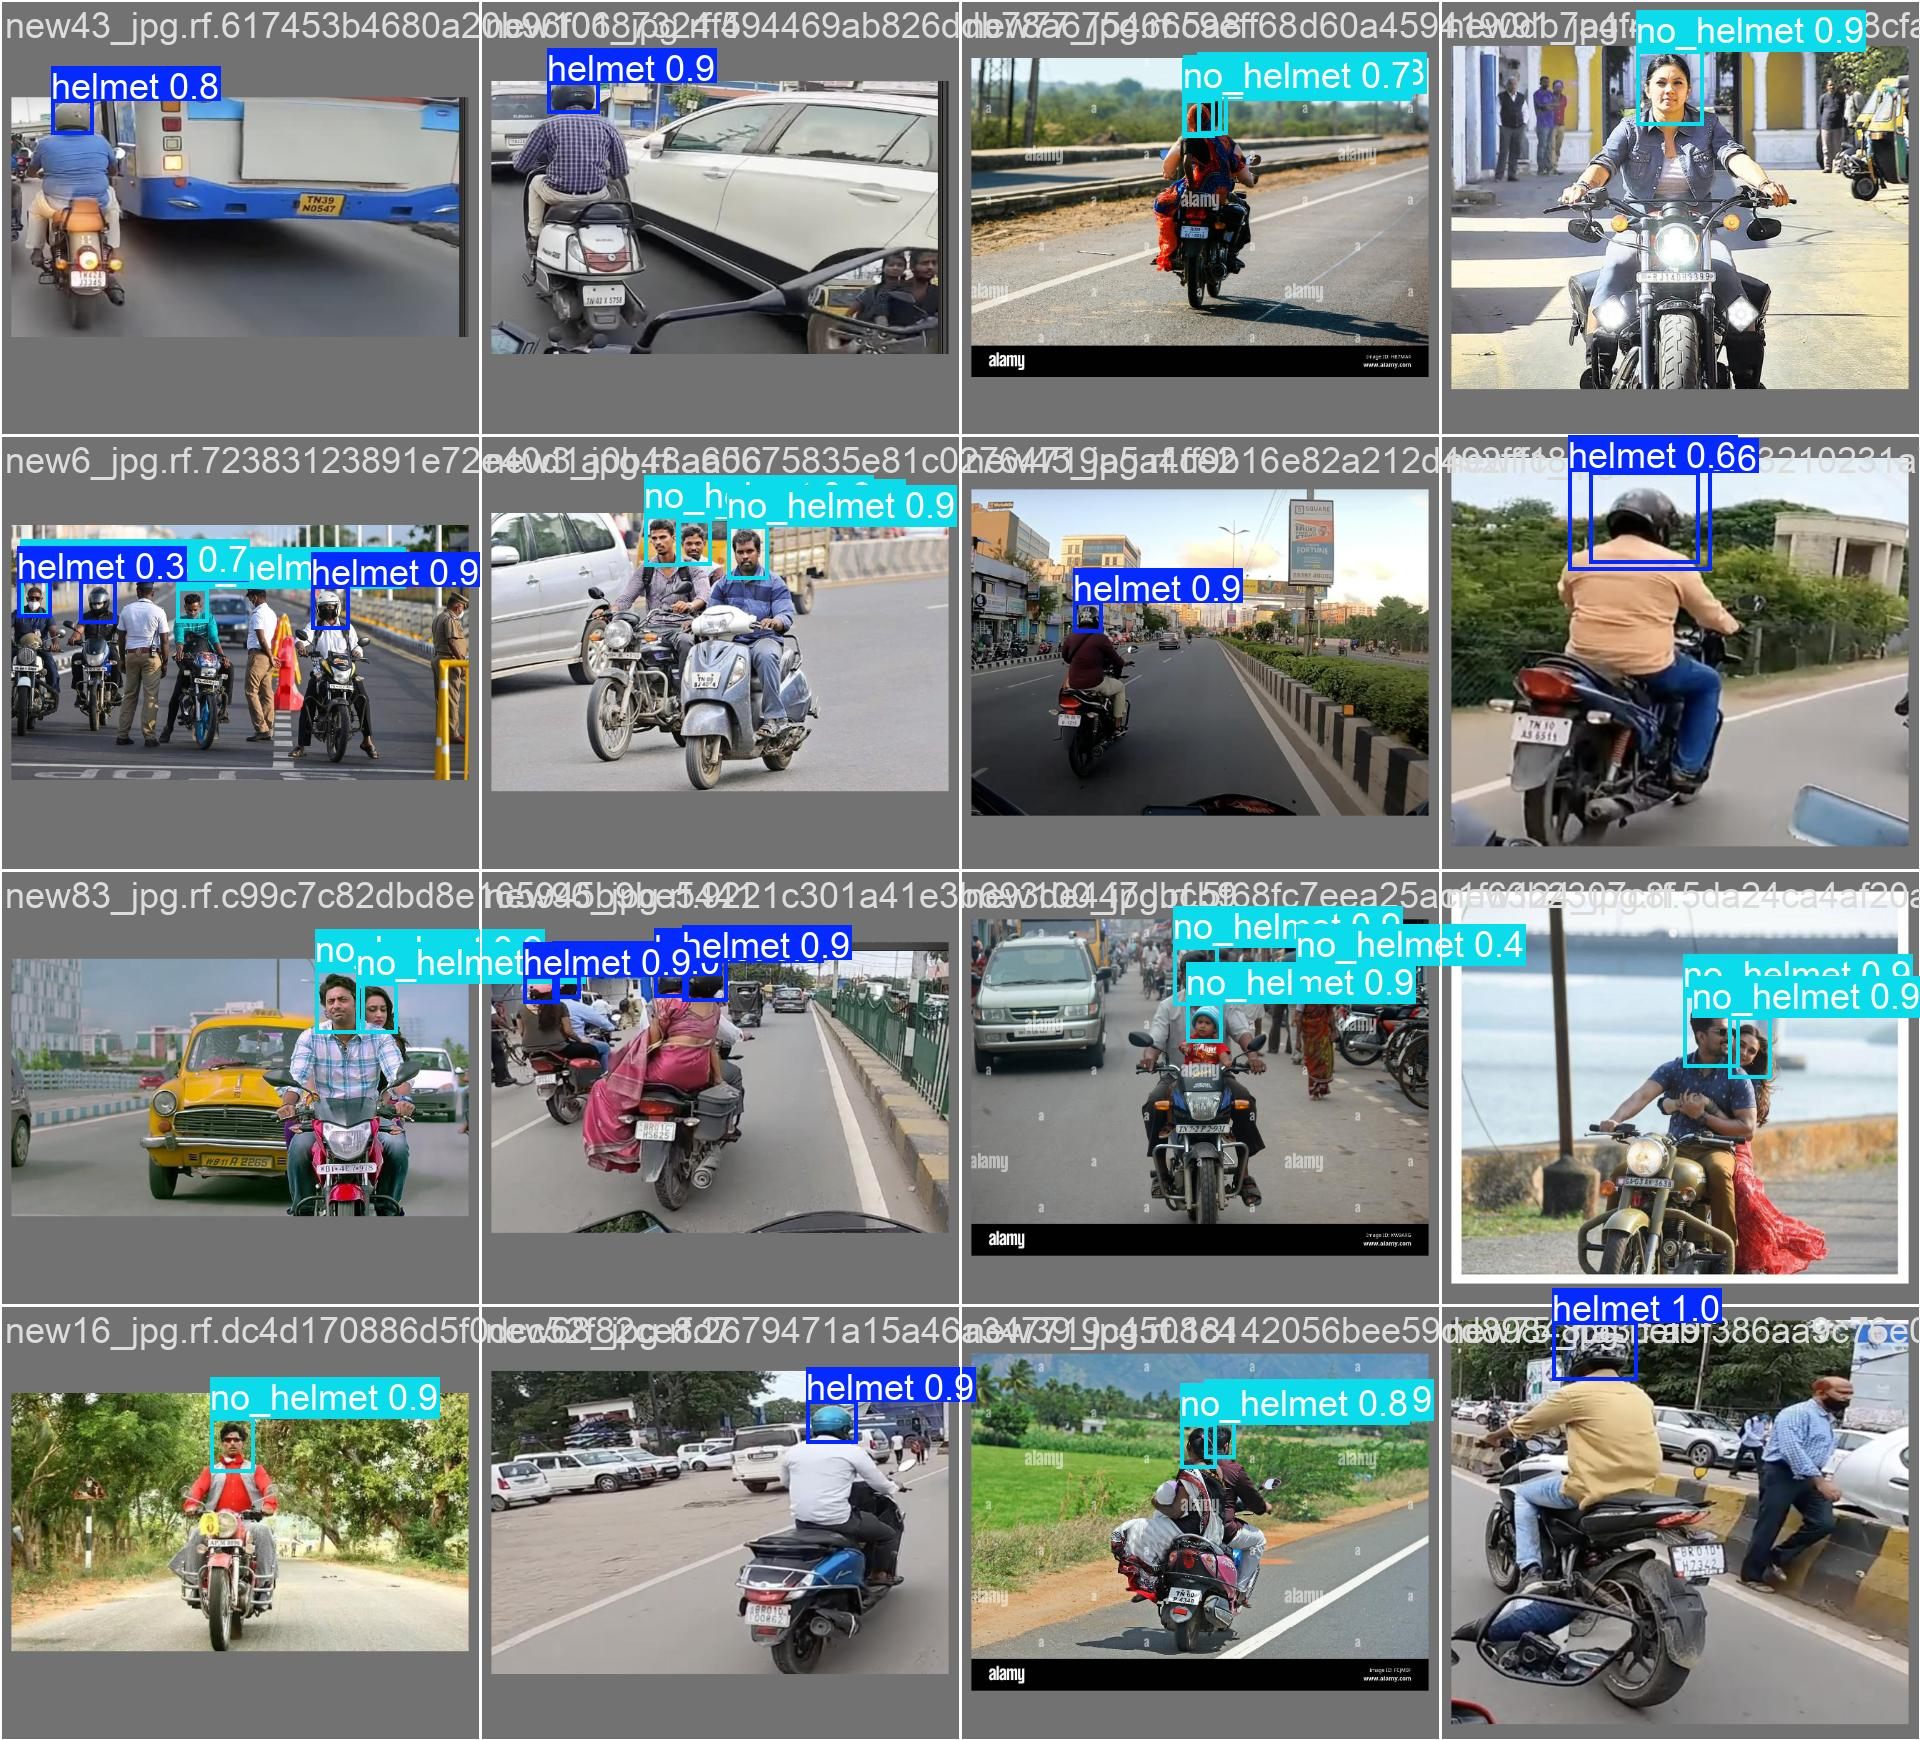




📊 Evaluasi model terbaik...
Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 590.0±559.7 MB/s, size: 62.3 KB)
val: Scanning /content/Helmet-Detection-2/train/labels.cache... 82 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 82/82 44.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 0.3it/s 21.4s
                   all         82        128      0.956      0.966      0.992      0.758
                helmet         46         58      0.989      0.931      0.993       0.77
             no_helmet         44         70      0.924          1      0.991      0.746
Speed: 4.1ms preprocess, 219.4ms inference, 0.0ms loss, 20.7ms postprocess per image
Results saved to /content/runs/detect/val3

✅ File evaluasi disimpan di: /content/runs/detect/helmet_d

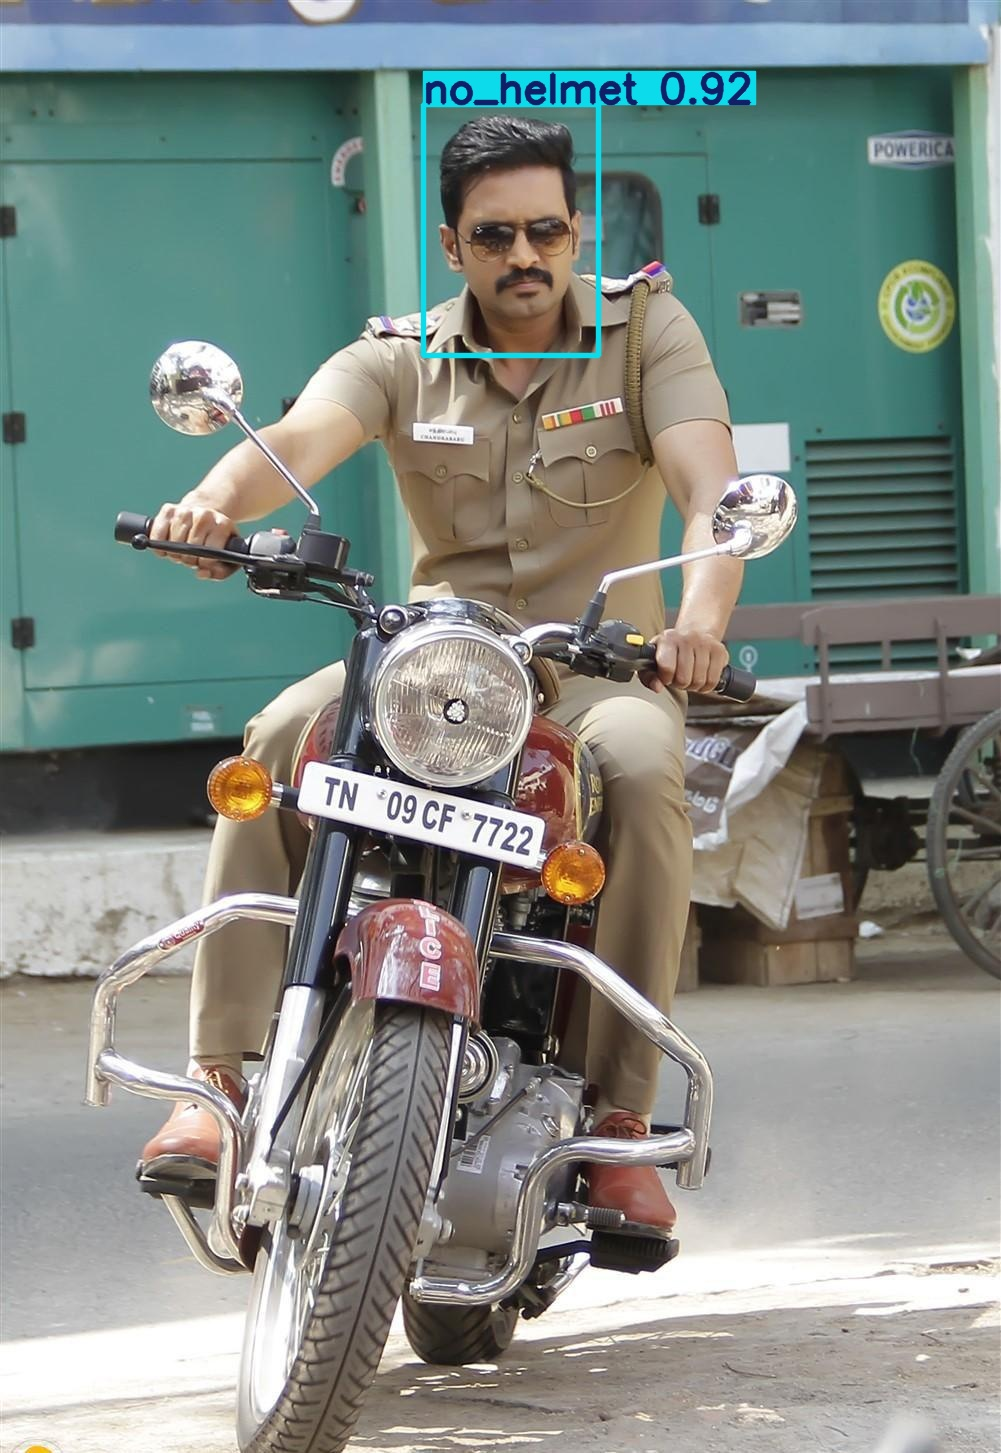

🖼️ Gambar 2: /content/Helmet-Detection-2/test/images/new122_jpg.rf.7c6f1aa3a7009b611f7fa58fff24994d.jpg
Results saved to /content/runs/detect/predict2


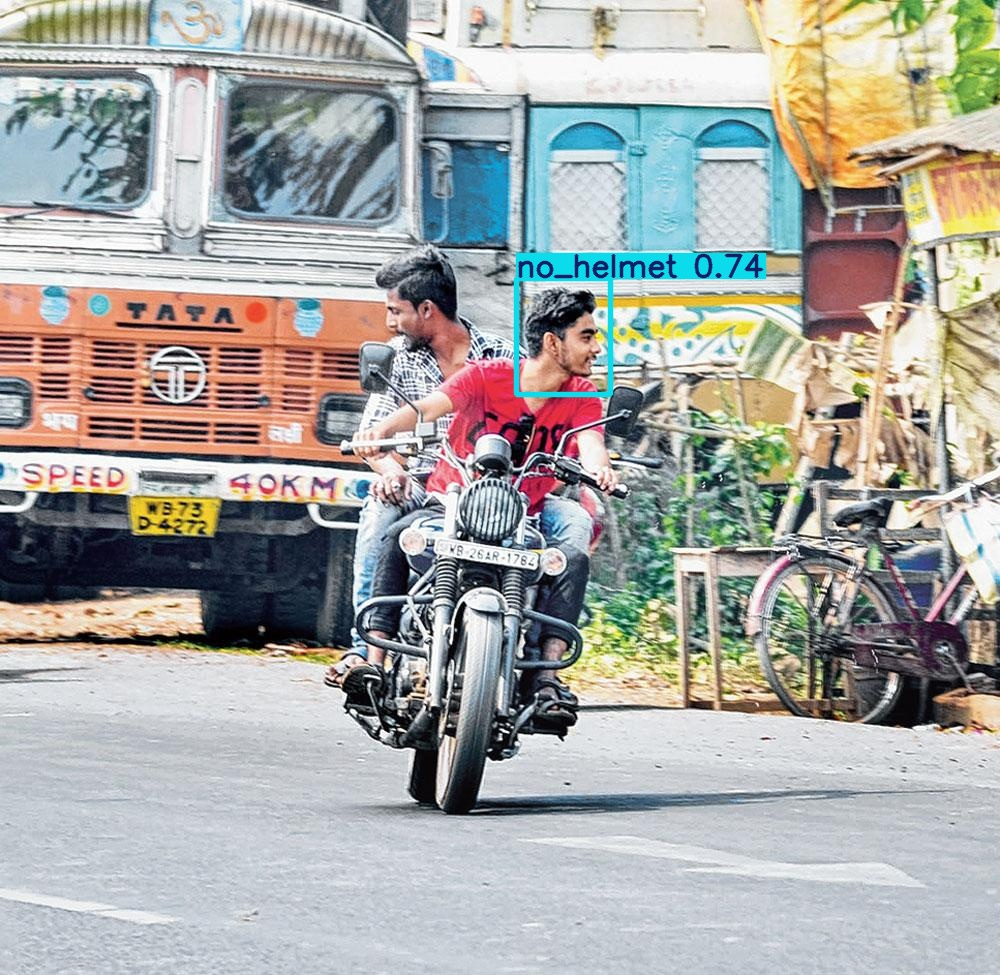

🖼️ Gambar 3: /content/Helmet-Detection-2/test/images/new108_jpg.rf.35a9c2f46da13dd72787a8bf4a2f6804.jpg
Results saved to /content/runs/detect/predict2


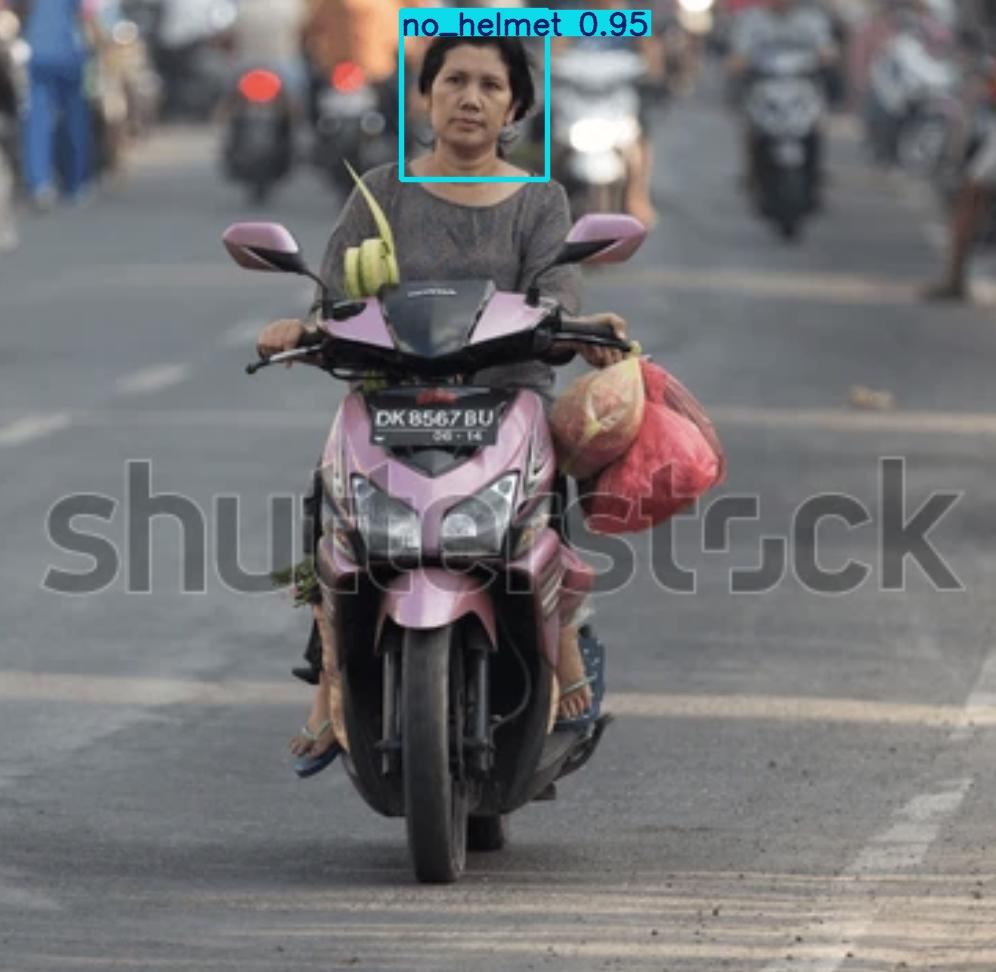

🖼️ Gambar 4: /content/Helmet-Detection-2/test/images/new7_jpg.rf.3694acc3ea892fa79e00fe13535e9d47.jpg
Results saved to /content/runs/detect/predict2


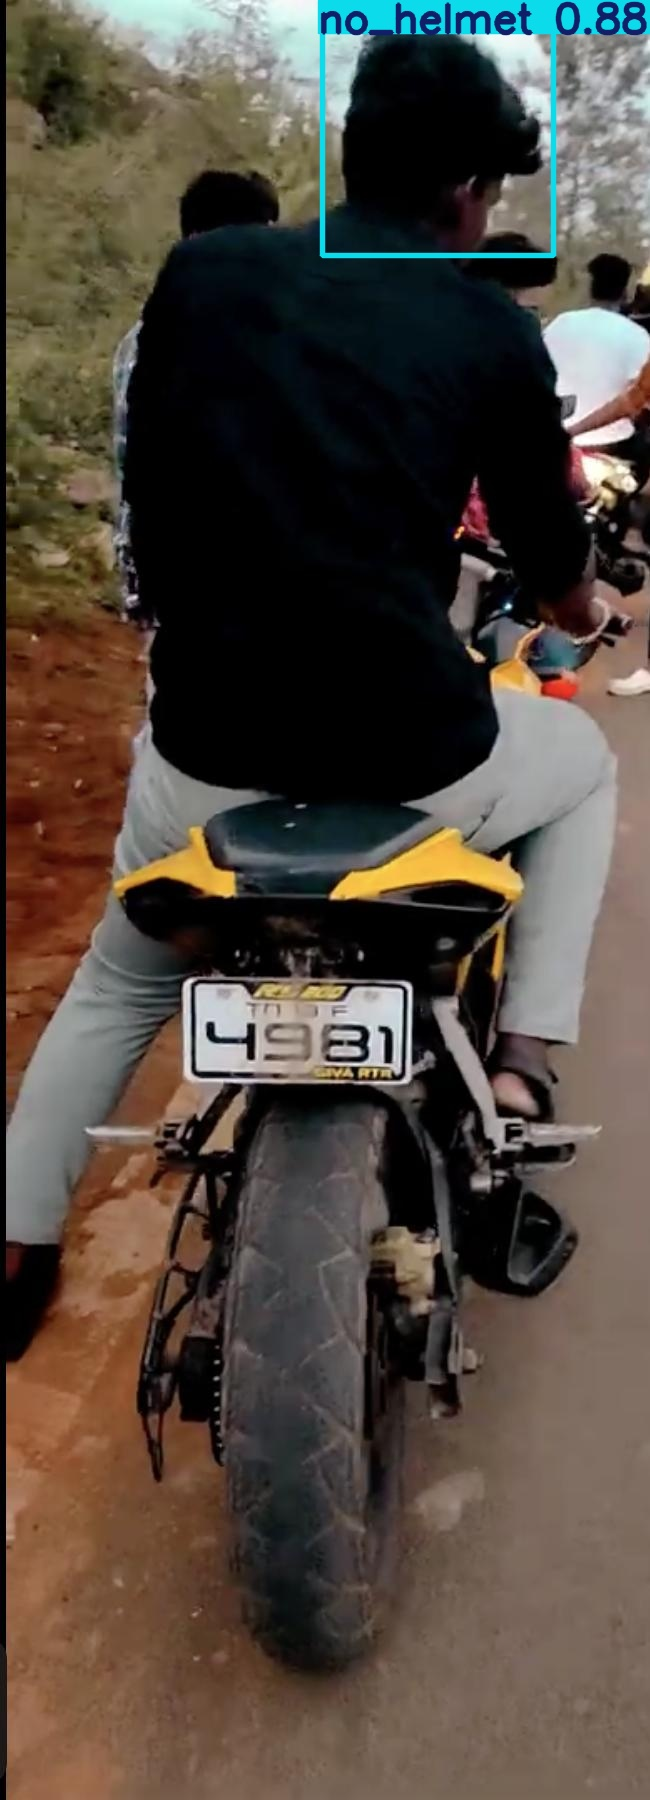

🖼️ Gambar 5: /content/Helmet-Detection-2/test/images/new97_jpg.rf.5ad314d7848349146623fdc1184546bf.jpg
Results saved to /content/runs/detect/predict2


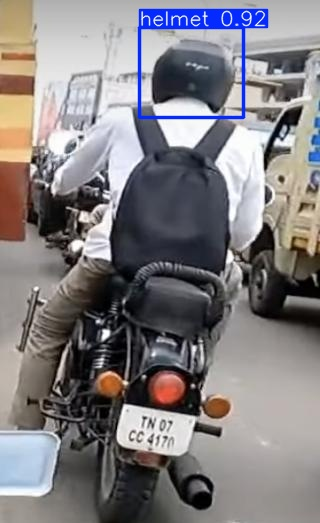

In [5]:
# === Instalasi Library ===
!pip install roboflow ultralytics opencv-python -q

# === Import Library ===
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image, display
import os, glob, json, random
import matplotlib.pyplot as plt
import pandas as pd

# === Unduh Dataset Helmet Detection ===
rf = Roboflow(api_key="97BKSCBw2Drbv6qpGq5J")
project = rf.workspace("jo-i0yms").project("helmet-detection-shw28")
version = project.version(2)
dataset = version.download("yolov8")

print(f"\n✅ Dataset berhasil diunduh!")
print(f"📁 Lokasi dataset: {dataset.location}")

# === Perbaiki data.yaml (jika tidak ada val:) ===
yaml_path = os.path.join(dataset.location, "data.yaml")

with open(yaml_path, "r") as f:
    yaml_data = f.read()

if "val:" not in yaml_data:
    yaml_data += f"\nval: {os.path.join(dataset.location, 'train/images')}\n"
else:
    yaml_data = yaml_data.replace("valid", "train")  # jaga-jaga kalau foldernya salah nama

with open(yaml_path, "w") as f:
    f.write(yaml_data)

print("\n✅ File data.yaml sudah diperbaiki:")
!cat {yaml_path}

# === Training Model YOLOv8 ===
!yolo task=detect mode=train model=yolov8n.pt \
data={yaml_path} \
epochs=30 imgsz=640 batch=8 name=helmet_detector_analysis

# === Cek folder hasil training ===
base_path = "/content/runs/detect"
train_folders = sorted(glob.glob(f"{base_path}/helmet_detector_analysis*"), key=os.path.getmtime)

if train_folders:
    latest_train = train_folders[-1]
    print(f"\n📁 Folder training ditemukan: {latest_train}\n")

    # === Tampilkan hasil training ===
    for img_name, title in [
        ("results.png", "📊 Training Metrics"),
        ("confusion_matrix.png", "🧩 Confusion Matrix"),
        ("val_batch0_pred.jpg", "🔍 Validation Predictions")
    ]:
        img_path = f"{latest_train}/{img_name}"
        if os.path.exists(img_path):
            print(f"{title}:")
            display(Image(filename=img_path, width=600))
            print("\n" + "="*60 + "\n")
        else:
            print(f"⚠️ {img_name} tidak ditemukan di {latest_train}")
else:
    print("❌ Tidak ada folder training ditemukan! Jalankan ulang training dan pastikan tidak error.")

# === Evaluasi Model ===
best_model_path = os.path.join(latest_train, "weights", "best.pt")
if os.path.exists(best_model_path):
    print("\n📊 Evaluasi model terbaik...")
    model = YOLO(best_model_path)
    metrics = model.val()
    metrics_dict = metrics.results_dict if hasattr(metrics, "results_dict") else {}

    metrics_path = os.path.join(latest_train, "metrics.json")
    with open(metrics_path, "w") as f:
        json.dump(metrics_dict, f, indent=4)

    print(f"\n✅ File evaluasi disimpan di: {metrics_path}")
    print(json.dumps(metrics_dict, indent=4))
else:
    print("❌ Model best.pt tidak ditemukan!")

# === Prediksi pada Dataset Test ===
test_dir = os.path.join(dataset.location, "test/images")

if os.path.exists(best_model_path):
    if os.path.exists(test_dir):
        sample_imgs = random.sample(os.listdir(test_dir), min(5, len(os.listdir(test_dir))))
        print(f"\n🔍 Menampilkan {len(sample_imgs)} contoh hasil deteksi dari test set:\n")

        model = YOLO(best_model_path)
        for i, img_name in enumerate(sample_imgs, 1):
            sample_path = os.path.join(test_dir, img_name)
            print(f"🖼️ Gambar {i}: {sample_path}")

            results = model.predict(source=sample_path, conf=0.5, save=True, verbose=False)
            result_img_path = os.path.join(results[0].save_dir, os.path.basename(sample_path))
            if os.path.exists(result_img_path):
                display(Image(filename=result_img_path, width=600))
            else:
                print("⚠️ Gambar hasil prediksi tidak ditemukan:", result_img_path)
    else:
        print("⚠️ Folder test/images tidak ditemukan.")
else:
    print("❌ Model best.pt belum tersedia, prediksi tidak bisa dilakukan.")
